### Course Plan

| Week | Topic                                                   |
|------|---------------------------------------------------------|
| 1    | Intro, basic concepts, Beta-Binomial model              |
| 2    | Making predictions, grid approximations                 |
| 3    | Bayesian classification and Laplace approximations      |
| 4    | Bayesian linear regression (Real Laplace)               |
| 5    | Distributions on function spaces, Gaussian Processes    |
| 6    | Gaussian process classification                         |
| 7    | Multi-class classification and decision theory          |
| 8    | Monte Carlo & Markov Chain Monte Carlo methods          |
| 9    | More on MCMC                                            |
| 10   | Mixture models and variational inference                |
| 11   | Black-box variational inference                         |
| 12   | More on variational inference                           |
| 13   | Bayesian neural networks                                |


# Overview of Distributions

## General Notes


When they say *marginal likelihood* they mean *evidence* I.e the normalizing constant in Bayes theorem $p(y)$.

**Important Rules:**

1. $p(x,y) = p(x|y)p(y) = p(y|x)p(x)$

2. $p(x,y) = p(x)p(y)$ if $x$ and $y$ are independent

3. $p(x|y) = \frac{p(x,y)}{p(y)}$ \[Conditional\]

4. $p(x, z|y) = p(a|z)p(z|y)$ \[Conditional Independence\]

For distributions we use $cdf$ for calculating probabilities 'above' a certain value and $pdf$ for calculating probabilities 'at' a certain value.

The evidence for a Beta-binomial distribution evaluates to this:

$$\begin{align*}
p(y) &= \int {N\choose y} \theta^{y}(1-\theta)^{N-y} \frac{1}{B(\alpha_0,\beta_0)}\theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \text{d}\theta\\
%
&= {N\choose y}\frac{B(y+\alpha_0, N-y+\beta_0)}{B(\alpha_0,\beta_0)} \\
\end{align*}$$

### Bishop and Murphy Smart Places

**(3.86) and (3.82)**: Maximum Likelihood Estimation type II Estimation (Evidence Approximation $p(y)$)

**(4.135) from Murphy**: The beta-binomial distribution.

**Murphy1 page 86-77** General Linear Gaussian systems

### Conjugate priors

| Likelihood          | Model Parameters | Conjugate prior (and posterior) distribution | Prior hyperparameters | Posterior hyperparameters    | Posterior predictive |
|---------------------|------------------|----------------------------------------------|-----------------------|---------------------------------------|-------------------------------|
| $p(x \mid \theta)$  | $\theta$         | $p(\theta)$, $p(\theta \mid x, \theta')$    | $\Theta$              | $\Theta'$                            | $p(x \mid \theta')$          |
| **Bernoulli**       | $p$ (probability)| Beta                                         | $\alpha, \beta \in \mathbb{R}$ | $\alpha + x, \beta + n - x$ | $\frac{\alpha'}{\alpha' + \beta'}$ (Bernoulli) |
| **Binomial**        | $p$ (probability)| Beta                                         | $\alpha, \beta \in \mathbb{R}$ | $\alpha + x, \beta + n m - x$ | $\text{BetaBin}\left(\alpha', \beta', m\right)$ (Beta-binomial) |
| **Poisson**         | $\lambda$ (rate)  | Gamma                                       | $k, \theta \in \mathbb{R}$ | $k + \sum_{i=1}^n x_i, \theta + n$ | $\text{NB}\left(\frac{k'}{\theta'}, 1\right)$ (Negative binomial) |
| **Categorical**     | $p$ (vector, $k$ categories) | Dirichlet                           | $\alpha \in \mathbb{R}^k$ | $\alpha + (c_1, \dots, c_k)$, where $c_i$ is the number of observations in category $i$ | $\frac{\alpha'_i}{\sum_{j=1}^k \alpha'_j}$ (Categorical) |
| **Multinomial**     | $p$ (vector, $k$ categories) | Dirichlet                           | $\alpha \in \mathbb{R}^k$ | $\alpha + \sum_{i=1}^n x_i$ | $\text{DirMult}\left(\alpha'\right)$ (Dirichlet-multinomial) |
| **Continuous Below** | --- | --- | --- | --- | --- |
| **Normal**          | $\mu, \sigma^2$  | Normal | $\mu_0, \sigma_0^2$ | $\frac{\sigma_0^2}{\sigma_0^2 + n\sigma^2} \bar{x} + \frac{n\sigma^2}{\sigma_0^2 + n\sigma^2} \mu_0, \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}$ | $\text{Normal}\left(\mu', \sigma'^2\right)$ |
| **Gamma**           | $\alpha, \beta$  | Gamma-Gamma                                   | $k, \theta, a, b$ | $k + n, \theta + \sum_{i=1}^n x_i, a + n\bar{x}, b + n$ | $\text{Gamma}\left(a', b'\right)$ |
| **Inverse Gamma**   | $\alpha, \beta$  | Inverse Gamma                                 | $\alpha, \beta$ | $\alpha + \frac{n}{2}, \beta + \frac{1}{2} \sum_{i=1}^n x_i^2$ | $\text{Inv-Gamma}\left(\alpha', \beta'\right)$ |
| **Beta**            | $\alpha, \beta$  | Beta                                          | $\alpha, \beta$ | $\alpha + \sum_{i=1}^n x_i, \beta + n - \sum_{i=1}^n x_i$ | $\text{Beta}\left(\alpha', \beta'\right)$ |


## Normal Distribution

In [ ]:
log_npdf = lambda x, m, v: -0.5*(x-m)**2/(v) - 0.5*np.log(2*np.pi*v)
npdf = lambda x, m, v: np.exp(log_npdf(x, m, v))

Given design matrix $ \Phi \in \mathbb{R}^{N \times D} $ and observations $ y \in \mathbb{R}^N $:

  $$ p(w) = \mathcal{N}(w \mid 0, \alpha^{-1} I) \tag{Prior}$$


  $$ p(y \mid w) = \mathcal{N}(y \mid \Phi w, \beta^{-1} I) \tag{Likelihood} $$

  $$ p(y) = \mathcal{N}(y \mid 0, \beta^{-1} I + \alpha^{-1} \Phi \Phi^T) \tag{Marginal Likelihood}$$

  $$ p(w \mid y) = \mathcal{N}(w \mid m_N, S_N) \tag{Posterior}$$

**With posterior parameters**:

  $$ m_N = \beta S_N \Phi^T y \tag{Posterior Mean} $$

  $$ S_N = (\alpha I + \beta \Phi^T \Phi)^{-1} \tag{Posterior Covariance} $$

**Two Hyperparameters**:
- $ \alpha $: prior precision of the regression weights
- $ \beta $: precision of the measurements


**Normal**

$$
\begin{align*}
\mathcal{N}(x|\mu,\sigma^2) &= \frac{1}{\sqrt{(2\pi\sigma^2)}}\exp\left\{-\frac{1}{2\sigma^2}(x-\mu)^2\right\} \\
\end{align*}
$$

**Log Normal**

$$
\ln \mathcal{N}\left(x \mid \mu, \sigma^2\right)=-\frac{1}{2 \sigma^2} x^2+\frac{\mu}{\sigma^2} x+K
$$

**Multivariate**:
The probability density function of a multivariate normal distribution is given by:

$$
p(x \mid \mu, \Sigma) = (2\pi)^{-\frac{D}{2}} |\Sigma|^{-\frac{1}{2}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right)
$$

Where:
- $ x $ and $ \mu $ are $ D $-dimensional vectors.
- $ \Sigma $ is a $ D \times D $ covariance matrix.
- $ |\Sigma| $ is the determinant of $ \Sigma $.
- $ \Sigma^{-1} $ is the inverse of $ \Sigma $.


**Logarithm of Multivariate:**
The logarithm of the probability density function of a multivariate normal distribution is simplified as follows:

  $$ \ln p(x \mid \mu, \Sigma) = -\frac{1}{2} x^T \Sigma^{-1} x + \mu^T \Sigma^{-1} x + \text{constant} $$

Also sometimes seen as:

$$
\ln \mathcal{N}(w \mid m, S) = -\frac{1}{2} w^T S^{-1} w + m^T S^{-1} w + \text{constant}
$$

## Poisson Distribution

The *poisson* dsitribution is used for *count* data and has the following form:
$$
p(y | \lambda)=\frac{\lambda^y e^{-\lambda}}{y!},
$$
where
- $y$ is the number of occurrences $(k=0,1,2, \ldots)$
- $e$ is Euler's number $(e=2.71828 \ldots)$
- $k!=k(k-1) \cdots(3)(2)(1)$ is the factorial.


The likelihood of the Poisson distribution is:
$$
L(\lambda | y)=\prod_{i=1}^{n} \frac{\lambda^{y_{i}} e^{-\lambda}}{y_{i} !}
$$

or 

$$
\log L(\lambda | y)=\sum_{i=1}^{n}\left(y_{i} \log (\lambda)-\lambda-\log \left(y_{i}!\right)\right)
$$

**Log Joint Distribution**
With a model on form:

$$
\begin{aligned}
y_n \mid \boldsymbol{w}, x_n & \sim \operatorname{Poisson}\left(\lambda_n\right) \\
\lambda_n & =e^{w_0+w_1 x_n} \\
\boldsymbol{w} & \sim \mathcal{N}\left(\mathbf{0}, \alpha^{-1} \boldsymbol{I}\right)
\end{aligned}
$$

The log joint distribution is:
\begin{aligned}
\log p(\boldsymbol{y}, \boldsymbol{w}) & =\sum_{n=1}^N \log p\left(y_n \mid \boldsymbol{w}, x_n\right)+\log p(\boldsymbol{w}) \\
& =-\frac{1}{2} \log (2 \pi)-\frac{1}{2} \alpha \boldsymbol{w}^T \boldsymbol{w}+\sum_{n=1}^N \log \frac{\lambda_n^{y_n} e^{-\lambda_n}}{y_{n}!} \\
& =-\frac{1}{2} \log (2 \pi)-\frac{1}{2} \alpha \boldsymbol{w}^T \boldsymbol{w}+\sum_{n=1}^N\left[y_n \log \lambda_n-\lambda_n+\log \frac{1}{y_{n}!}\right] \\
& =-\frac{1}{2} \alpha \boldsymbol{w}^T \boldsymbol{w}+\sum_{n=1}^N\left[y_n \log \lambda_n-\lambda_n\right]+K \\
& =-\frac{1}{2} \alpha \boldsymbol{w}^T \boldsymbol{w}+\sum_{n=1}^N y_n \log \lambda_n-\sum_{n=1}^N \lambda_n+K
\end{aligned}

## Binomial distribution

First we re-cap the ***Binomial distribution***. The Binomial distribution is a discrete probability distribution representing the number of successes in a sequence of **independent Bernoulli trials** and it is specified through its **probability mass function (PMF)**:

$$
\begin{align*}
p(y|N, \theta) &= \text{Bin}(y|N, \theta)\\
&= {N\choose y} \theta^{y}(1-\theta)^{N-y},
\end{align*}$$

where $N$ is the number of trials, $\theta \in \left[0, 1\right]$ is the probability of success in each individual trial and $y \in \left\lbrace 0, 1, \dots, N \right\rbrace$ is the total number of successes. The quantity ${N\choose y}$ is a called a binomial coefficient and is pronounced "$N$ choose $y$" and counts the number of ways $y$ items can be chosen from a set of $N$ items. The simplest way to estimate $\theta$ is through **maximum likelihood estimation (MLE)**, which for this model can be done analytically:

$$\hat{\theta}_{\text{MLE}} = \arg\max_{\theta} p(y|N, \theta) = \frac{y}{N}.$$

We can also compute a classic/frequentist 95%-**confidence interval**:

$$\hat{\theta}_{\text{MLE}} \pm 1.96 \sqrt{\frac{\hat{\theta}_{\text{MLE}}(1-\hat{\theta}_{\text{MLE}})}{N}}.$$

Technically, this type of interval is called a **Wald interval** and relies on a Gaussian approximation, but we won't cover these details in this course. Note that a **confidence interval** is **generally not** the same as a **posterior credibility interval** (see Section 4.6.6 in Murphy1). 

## Beta Distribution

The ***Beta distribution*** is distribution over random variables in the unit interval. The **probability density function (PDF)** of the Beta distribution  has two parameters $\alpha_0 > 0$ and $\beta_0 > 0$ and is given by

$$p(\theta|\alpha_0,\beta_0) = \frac{1}{B(\alpha_0,\beta_0)}\theta^{\alpha_0-1}(1-\theta)^{\beta_0-1},$$

where $B(\alpha_0, \beta_0)$ is a normalization function that ensures that the density integrates to one:

$$B(\alpha_0,\beta_0) = \int \theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \text{d}\theta = \frac{\Gamma(\alpha_0)\Gamma(\beta_0)}{\Gamma(\alpha_0+\beta_0)},$$

where $\Gamma$ is the so-called gamma function, which we won't dive deeper into in this course. Since $B(\alpha_0,\beta_0)$ is a constant wrt. $\theta$, it holds that

$$p(\theta|\alpha_0,\beta_0) \propto \theta^{\alpha_0-1}(1-\theta)^{\beta_0-1},$$

and therefore, we say that $f(\theta) = \theta^{a-1}(1-\theta)^{b-1}$ is the **functional form** of a Beta distribution for some $a,b > 0$.

The **mean** of a Beta-distributed random variable, $\theta \sim \text{Beta}(\alpha_0, \beta_0)$, is given by

$$\mathbb{E}\left[\theta\right] = \int_0^1 \theta \, p(\theta|\alpha_0,\beta_0) \,\text{d} \theta  = \frac{\alpha_0}{\alpha_0+\beta_0}. \tag{1}$$

The quantity $\mathbb{E}\left[\theta\right]$ is also sometimes refered to as the **expected value** of $\theta$ or the **first moment** of $\theta$. The **variance** of $\theta$ is

$$\mathbb{V}\left[\theta\right] = \int_0^1 \left(\theta - \mathbb{E}\left[\theta\right] \right)^2 \, p(\theta|\alpha_0,\beta_0) \,\text{d} \theta  = \frac{\alpha_0 \beta_0}{(\alpha_0+\beta_0)^2(\alpha_0+\beta_0+1)}.$$

When $\alpha_0, \beta_0 > 1$ the Beta density is unimodal with the mode given by 

$$\theta_{\text{mode}} = \frac{\alpha_0 - 1}{\alpha_0 + \beta_0 - 2}.$$

## Beta Binomial model

\begin{align*}
p(\theta) &= \text{Beta}(\theta \mid a_0, b_0) \quad &\text{(Prior)} \\
p(y \mid \theta) &= \binom{N}{y} \theta^y (1 - \theta)^{N-y} \quad &\text{(Likelihood)} \\
p(\theta \mid y) &= \text{Beta}(\theta \mid y + a_0, N - y + b_0) \quad &\text{(Posterior)}
\end{align*}

**Log Joint Distribution**

$$
\begin{align*}
\ln p(y, \theta) &= (\alpha_0 + y - 1)  \ln \theta +  (\beta_0 + N-y -1)\ln (1-\theta) + k
\end{align*}
$$

**The joint distribution** of all variables can be expressed via the **product rule**:

$$ p(\theta, y) = p(y \mid \theta) p(\theta) $$

**The posterior distribution** can be obtained by **conditioning on y**:

$$ p(\theta \mid y) = \frac{p(y, \theta)}{p(y)} = \frac{p(y \mid \theta) p(\theta)}{p(y)} $$

**The evidence** $ p(y) $ can be obtained from the joint distribution via the **sum rule**:

$$ p(y) = \int p(y, \theta) d\theta = \int p(y \mid \theta) p(\theta) d\theta $$


We can express the evidence of a beta-Binomial model as:

$$\begin{align*}
p(y) &= \int {N\choose y} \theta^{y}(1-\theta)^{N-y} \frac{1}{B(\alpha_0,\beta_0)}\theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \text{d}\theta\\
%
&= {N\choose y}\frac{1}{B(\alpha_0,\beta_0)} \int  \theta^{y}(1-\theta)^{N-y} \theta^{\alpha_0-1}(1-\theta)^{\beta_0-1} \text{d}\theta\\
%
&= {N\choose y}\frac{1}{B(\alpha_0,\beta_0)} \int  \theta^{y+\alpha_0-1}(1-\theta)^{N-y+\beta_0-1}  \text{d}\theta\\
%
&= {N\choose y}\frac{1}{B(\alpha_0,\beta_0)} B(y+\alpha_0, N-y+\beta_0)\\
%
&= {N\choose y}\frac{B(y+\alpha_0, N-y+\beta_0)}{B(\alpha_0,\beta_0)} \\
\end{align*}$$

We can consider a model with a predictive likelihood from **Slide 11 Week 2**:

  $$ p(y \mid \theta) = \text{Bin}(y \mid N, \theta) \tag{Likelihood} $$

  $$ p(y^* \mid \theta) = \text{Bin}(y^* \mid N^*, \theta) \tag{Predictive likelihood} $$

  $$ p(\theta) = \text{Beta}(\theta \mid a_0, b_0) \tag{Prior}$$

**The beta distribution** is a particularly convenient choice for Binomial likelihoods:

- **Prior distribution**:
  $$ p(\theta) = p(\theta \mid a_0, b_0) = \frac{1}{B(a_0, b_0)} \theta^{a_0 - 1} (1 - \theta)^{b_0 - 1} $$

- **Likelihood**:
  $$ p(y \mid \theta) = \binom{N}{y} \theta^y (1 - \theta)^{N-y} $$

**Bayes' rule states**:

$$ p(\theta \mid y) = \frac{p(y \mid \theta) p(\theta)}{p(y)} \propto p(y \mid \theta) p(\theta) $$

Breaking it down:

$$ p(\theta \mid y) \propto \binom{N}{y} \theta^y (1 - \theta)^{N-y} \cdot \frac{1}{B(a_0, b_0)} \theta^{a_0 - 1} (1 - \theta)^{b_0 - 1} $$

Combining the exponents of $ \theta $ and $ (1 - \theta) $, we get:

$$ \theta^{y + a_0 - 1} (1 - \theta)^{N - y + b_0 - 1} $$

This is proportional to:

$$ \text{Beta}(\theta \mid y + a_0, N - y + b_0) $$

**Key take-away**: The posterior distribution is another Beta distribution with parameters:
- $ a = y + a_0 $
- $ b = N - y + b_0 $

Therefore we know how to compute the **posterior distribution**:
$$ p(\theta \mid y) = \text{Beta}(\theta \mid y + a_0, N - y + b_0) $$


To compute the **posterior predictive distribution**:
$$ p(y^* \mid y) = \int p(y^* \mid \theta) p(\theta \mid y) d\theta = \int \text{Bin}(y^* \mid N^*, \theta) \text{Beta}(\theta \mid y + a_0, N - y + b_0) d\theta $$


In [ ]:
class BetaBinomial(object):

    def __init__(self, y, N, alpha0=1., beta0=1.):
        # data
        self.y, self.N = y, N
        # hyperparameters
        self.alpha0, self.beta0 = alpha0, beta0
        # true posterior parameters
        self.alpha, self.beta = alpha0 + y, beta0 + N - y

    @property
    def posterior_mean(self):
        """ compute the exact posterior mean """
        return self.alpha/(self.alpha + self.beta)
    
    @property
    def posterior_variance(self):
        """ compute the exact posterior variance """
        return self.alpha*self.beta/((self.alpha+self.beta)**2*(self.alpha+self.beta+1))

    def pdf(self, theta):
        return beta_dist.pdf(theta, self.alpha, self.beta)
    
    def log_joint(self, theta_):
        """ evaluates and return the log joint p(y, theta_) """
        return (self.alpha0 + self.y - 1)*np.log(theta_) + (self.beta0 + self.N - self.y - 1)*np.log(1-theta_) 

    def grad(self, theta_):
        """ evaluates and return the gradient of the log joint p(y, theta) write to theta evaluated at theta_ """
        return (self.alpha0 + self.y - 1)/theta_ - (self.beta0 + self.N - self.y - 1)/(1 - theta_) 

    def hessian(self, theta_):
        """ evaluates and return the hessian of the log joint p(y, theta) write to theta evaluated at theta_ """
        return -(self.alpha0 + self.y - 1)/theta_**2 - (self.beta0 + self.N - self.y - 1)/(1-theta_)**2 


# specify data and instantiate model
N = 12
y = 2
model = BetaBinomial(y, N)

# plot exact posterior density
theta_grid = np.linspace(-0.25, 1.25, 1000)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(theta_grid, model.pdf(theta_grid), label='$p(\\theta|y)$', linewidth=2)
ax.set(xlabel='$\\theta$', ylabel='Density')
ax.legend()

# report exact posterior mean and variance
print(f'The exact posterior mean is {model.posterior_mean:4.3f}')
print(f'The exact posterior variance is {model.posterior_variance:4.3f}')

## Gamma Distribution

In [ ]:
# Apparently it is ok to assume the Log Gamma to be
log_gamma = lambda a: -a # + constant

# Classification
**Week 4**


For a **binary classification problem** the marginal density of $ x_n $ is a **mixture distribution** and is obtained using the **sum rule** (**Week 4 Slide 21**):

$$
p(x_n) = \sum_{k \in \{0,1\}} p(x_n \mid y_n = k) p(y_n = k) = \pi_0 p(x_n \mid y_n = 0) + \pi_1 p(x_n \mid y_n = 1)
$$


For a multiclass problem we use the **softmax** as our mixture distribution:

$$
p(y_n = k \mid x_n) = \frac{p(x_n \mid y_n = k) P(y_n = k)}{\sum_{i=1}^K p(x_n \mid y_n = i) P(y_n = i)} = \frac{\exp(a_k)}{\sum_{j=1}^K \exp(a_j)}
$$


We can use **accuracy** and **ELPD** (expected log predictive density) from **Week 4, Exercise** to quantify the performance of the classifier is given by

$$
\begin{align}
\text{ELPD}(\textbf{y}^*, \textbf{p}^*) = \frac{1}{M} \sum_{i=1}^M \log \left(\text{Ber}(y^*_i|p^*_i)\right),
\end{align}
$$

where $\textbf{y}^*$ in this case is the vector of ground truth values and $\textbf{p} ^*$ is a vector of predictive probabilities, i.e. $p^*_i = p(y^*_i=1|\textbf{x}^*_i)$. Accuracy only measures how often we are correct and incorrect, whereas the ELPD also takes in uncertainty into account. For both metrics, larger values are better.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

data = np.load('./mnist_subset_89.npz')
Itrain, Itest  = data['Itrain'], data['Itest']
Xtrain, Xtest = data['Xtrain'], data['Xtest']
ytrain, ytest = data['ytrain'], data['ytest']
digits = data['digits']

Code for plotting

In [ ]:
def eval_density_grid(density_fun, dim1_array, dim2_array):
    """ evaluates the function density_fun on two 2d grid formed by the values in the two arrays: dim1_array and dim2_array """
    X1, X2 = np.meshgrid(dim1_array, dim2_array, indexing='ij')
    XX = np.column_stack((X1.ravel(), X2.ravel()))
    return density_fun(XX).reshape((len(dim1_array), len(dim2_array)))

def plot_distribution(ax, dim1_array, dim2_array, density_fun, color=None, alpha=1, label=None, title=None, num_points = 100):
  
    # evaluate density for every point in the grid and reshape back
    Z = eval_density_grid(density_fun, dim1_array, dim2_array)
    
    # plot contour      
    cs = ax.contour(dim1_array, dim2_array, np.exp(Z).T, colors=color, alpha=alpha)

    # hack to add label
    if label:
        ax.plot([-1000, -1000], [-1000, -1000], color=color, label=label)
        ax.set(xlim=[dim1_array[0], dim1_array[-1]], ylim=[dim2_array[0], dim2_array[-1]])


# estimate parameters for p(x|y=0)
m0 = np.mean(Xtrain[ytrain==0, :], axis=0)
S0 = np.cov(Xtrain[ytrain==0, :].T)

# estimate parameters for p(x|y=1)
m1 = np.mean(Xtrain[ytrain==1, :], axis=0)
S1 = np.cov(Xtrain[ytrain==1, :].T)

# specify grids for plotting (I usually different different number of points in each dimension to make debugging easier)
dim1_array = np.linspace(-5, 5, 100)
dim2_array = np.linspace(-5, 5, 101)

# define function evaluating  class-conditionals
log_p_x_given_y0 = lambda x: stats.multivariate_normal.logpdf(x, m0, S0)
log_p_x_given_y1 = lambda x: stats.multivariate_normal.logpdf(x, m1, S1)

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_distribution(ax, dim1_array, dim2_array, log_p_x_given_y0, color='b', alpha=0.4, label='$p(x|y=0)$')
plot_distribution(ax, dim1_array, dim2_array, log_p_x_given_y1, color='r', alpha=0.4, label='$p(x|y=1)$')
ax.legend();

# Sampling
**Mostly week 8**

## Ancestral Sampling
**Week 8**

**Ancestral sampling** is a simple technique for sampling from joint probability distribution using conditional distributions. Consider the following model for $p(x_1, x_2, x_3, x_4)$:

$$\begin{align*}
x_1 &\sim \mathcal{N}(x_1|0, 3)\\
x_2 &\sim \mathcal{N}(x_2|1, 1)\\
x_3|x_2, x_1 &\sim \mathcal{N}(x_3|x_1+x_2, 2)\\
x_4|x_3 &\sim \mathcal{N}(x_4|x_3^2, 1)
\end{align*}$$

with the joint distribution given by
$$\begin{align*}
p(x_1, x_2, x_3, x_4) = p(x_1)p(x_2)p(x_3|x_1, x_2)p(x_4|x_3).
\end{align*}$$

In [ ]:
S = 1000

x1 = np.random.normal(0, np.sqrt(3), size=S)
x2 = np.random.normal(1, np.sqrt(1), size=S)
x3 = np.random.normal(x1+x2, np.sqrt(2), size=S)
x4 = np.random.normal(x3**2, np.sqrt(1), size=S)

## Monte Carlo Sampling
**Week 8**

The core idea of MCMC methods is to construct a Markov chain such that its **stationary distribution** will be equal to the distribution we want to sample from. Informally, we are creating a type of random walk that explores the parameter space of the target distribution in way where regions with high density are visited more frequently than areas with low density.

Our goal is to estimate the expectation

$$
\hat{f} = \mathbb{E}[f(z)] = \int f(z) p(z) \, dz
$$

Suppose we can get a number of i.i.d. samples from the distribution $z_i \sim p(z)$, then the **Monte Carlo (MC) estimator** is given by

$$
\hat{f} \approx \tilde{f} = \frac{1}{S} \sum_{i=1}^S f(z_i)
$$

The Monte Carlo estimator $\tilde{f}$ is a **random variable**.


More formally we can write:

We use *Monte Carlo* sampling as defined in **Week 8** of the course:

$$
\mathbb{E}_{p(\theta \mid y)}[\theta]=\int \theta p(\theta \mid y) \mathrm{d} \theta \approx \frac{1}{S} \sum_{i=1}^S \theta^{(i)}, \quad \theta^{(i)} \sim p(\theta \mid y)
$$

Working for any function:

$$
\mathbb{E}_{p(\theta \mid y)}[f(\theta)]=\int f(\theta) p(\theta \mid y) \mathrm{d} \theta \approx \frac{1}{S} \sum_{i=1}^S f(\theta^{(i)}), \quad \theta^{(i)} \sim p(\theta \mid y)
$$

## Metropolis Hastings
**Week 8**

We want to sample from target distribution $p(\mathbf{\theta})$ and assume $q(\mathbf{\theta}^*|\mathbf{\theta}^{k-1})$ to be a symmetric proposal distribution.

### The Metropolis Hastings Algorithm
- Start from some initial value $\theta^0$.

- Repeat for $k = 1$ to $K$:
  1. Given the last value $\theta^{k-1}$, generate a **candidate sample** using the proposal distribution
     $$
     \theta^* \sim q(\theta^* \mid \theta^{k-1})
     $$
  2. Compute the **acceptance probability** $A_k$,
  $$
      \begin{align*}
      A_k = \min(1, r_k), \quad\quad\quad\text{where}\quad r_k = \frac{p_t(\mathbf{\theta}^{\star})  q(\mathbf{\theta}^{k-1}|\mathbf{\theta}^{\star}) }{p_t(\mathbf{\theta}^{k-1}) q(\mathbf{\theta}^{\star}|\mathbf{\theta}^{k-1})}  \quad\quad\quad\text{For symmetric proposals} \frac{p(\theta^*)}{p(\theta^{k-1})}
      \end{align*}
   $$
  3. Simulate $u_k \sim U(0, 1)$ and define $\theta^k$ as
     $$
     \theta^k =
     \begin{cases}
     \theta^* & \text{if } u_k < A_k \\
     \theta^{k-1} & \text{otherwise}
     \end{cases}
     $$


## Gibbs Sampling
**Week 8**

Where Metropolis has the Markov Property (The future only depends on what we do right now), Gibbs sampling uses all up until this point when sampling from the posterior conditionals:

- Initialize all parameter values $\{z_i\}_{i=1}^D$.

- Repeat for $k = 1$ to $K$:
  - Sample $z_1^k \sim p(z_1 \mid z_2^{k-1}, z_3^{k-1}, \ldots, z_D^{k-1})$.
  - Sample $z_2^k \sim p(z_2 \mid z_1^k, z_3^{k-1}, \ldots, z_D^{k-1})$.
  - Sample $\ldots$
  - Sample $z_D^{k+1} \sim p(z_D \mid z_1^k, z_2^k, z_3^k, \ldots, z_{D-1}^k)$.


Fx for this the target distribution:

$$
\begin{align*}
y|w &\sim \mathcal{N}(y|w_1x_1+w_2x_2,\sigma^2) \\
w_1 &\sim \mathcal{N}(w_1|0, \kappa^2) \\
w_2 &\sim \mathcal{N}(w_2|0, \kappa^2) \\
\end{align*}
$$

We firstly write the joint density $p(y,w_1,w_2)$:

$$
p(y,w_1,w_2) = \mathcal{N}(y|w_1x_1+w_2x_2, \sigma^2)\mathcal{N}(w_1|0, \kappa^2)\mathcal{N}(w_2|0, \kappa^2)
$$

# Approximation Methods

## Grid Approximation
**Week 2**

Constructing the grid approximation for $p(\theta \mid y)$

1. We define a set of grid points for $\theta$: $0 \leq \theta_1 < \theta_2 < \cdots < \theta_M \leq 1$
2. We evaluate the exact posterior (up to a constant) at all the grid points, i.e. $\tilde{\pi}_i \propto p(\theta_i \mid y) \propto p(y \mid \theta_i)p(\theta_i)$
3. Sum all values to get normalization constant $Z = \sum_{j=1}^M \tilde{\pi}_j$
4. Compute normalized probabilities $\pi_i = \frac{1}{Z} \tilde{\pi}_i$ **to get the grid approximation**:
   $$ q(\theta) = \sum_{i=1}^M \pi_i \delta(\theta - \theta_i) $$


In [ ]:
class Grid2D(object):
    """ helper class for evaluating the function func on the grid defined by (alpha, beta)"""

    def __init__(self, alphas, betas, func, name="Grid2D"):
        self.alphas = alphas
        self.betas = betas
        self.grid_size = (len(self.alphas), len(self.betas))
        self.alpha_grid, self.beta_grid = np.meshgrid(alphas, betas, indexing='ij')
        self.func = func
        self.name = name
        
        # evaluate function on each grid point
        self.values = self.func(self.alpha_grid[:, :, None], self.beta_grid[:, :, None]).squeeze()

    def plot_contours(self, ax, color='b', num_contours=10, f=lambda x: x, alpha=1.0, title=None):
        ax.contour(self.alphas, self.betas, f(self.values).T, num_contours, colors=color, alpha=alpha)
        ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
        ax.set_title(self.name, fontweight='bold')

    @property
    def argmax(self):
        idx = np.argmax(self.values)
        alpha_idx, beta_idx = np.unravel_index(idx, self.grid_size)
        return self.alphas[alpha_idx], self.betas[beta_idx]

num_alpha, num_beta = 90, 100
alphas = np.linspace(-4, 4, num_alpha)
betas = np.linspace(-4, 4, num_beta)

# evalute log prior, log likelihood and log joint on the (alpha, beta)-grid
model = LogisticRegression(x, y, N, sigma2_alpha=1.0, sigma2_beta=1.0)
log_prior_grid = Grid2D(alphas, betas, model.log_prior, 'Prior')
log_lik_grid = Grid2D(alphas, betas, model.log_likelihood, 'Likelihood')
log_joint_grid = Grid2D(alphas, betas, model.log_joint, 'Posterior')

## Laplace Approximation
**Week 3**

Laplace Approximation $q(\theta) = \mathcal{N}(\theta|\textbf{m}, \textbf{V})$ is done by performing a second order Taylor expansion of the log joint $f(\theta) = \log p(\theta, y)$ around the mode, I.e the $\theta_{MAP}$. **(Week 4 Exercises)**

$$\begin{align*}
\log f(\theta) \approx \log f(\theta_{\text{MAP}}) - \frac{1}{2}(\theta-\theta_{\text{MAP}})A(\theta - \theta_{\text{MAP}})
\end{align*}
$$

$\mathbf{V}=\mathbf{A}= -\nabla \nabla \log p(\theta, y) \mid_{\theta_{\text{MAP}}}$, also known as the hessian evaluated at the $w_{MAP}$.

$\mathbf{m} = \theta_{\text{MAP}}$

**The following code assumes that the $model$ has the grad and hessian functions implemented.**

In [ ]:
from scipy.optimize import minimize
# helper functions implementing the pdf of a normal distribution
log_npdf = lambda x, m, v: -(x-m)**2/(2*v) - 0.5*np.log(2*np.pi*v)
npdf = lambda x, m, v: np.exp(log_npdf(x, m, v))

class LaplaceApproximation1D(object):

    def __init__(self, model, init_param=0):
        self.model = model
        self.param_MAP = None
        self.param_Hessian = None
        self.mean = None
        self.variance = None
        self.construct_approximation()

    def construct_approximation(self):

        # get MAP solution by optimization
        opt_results = minimize(lambda x: -model.log_joint(x), jac= lambda x: -model.grad(x), x0=0.5, bounds=[(1e-10,1-1e-10)])
        if not opt_results.success:
            print(opt_results)
            raise ValueError("Optimization failed. Printing the details from optimization for debugging")

        # evaluation Hessian at the mode
        self.param_MAP = opt_results.x                              
        self.Hessian = self.model.hessian(self.param_MAP)       
        self.mean = self.param_MAP                              
        self.variance = -1./self.Hessian                        

    def taylor_approx(self, theta):
        """" computes and returns the 2nd order Taylor approximation for f(theta) evalauted at theta """
        return self.model.log_joint(self.mean) + self.Hessian*(self.mean-theta)**2 
        
    def pdf(self, theta):
        """ evaluates the PDF of the Laplace approximation q(theta) at input parameter value theta """
        return npdf(theta, self.mean, self.variance) 


# specify data and instantiate model
N = 12
y = 2
# model = BetaBinomial(y, N)

# Shape of Xtrain: (197, 2)
# Shape of ytrain: (197,)
model = LogisticRegression(Xtrain, ytrain)
laplace_approx = LaplaceApproximation1D(model)

## Plug-in Method
**Week 1**

If we **assume** that there is a **single best parameter** $ \hat{\theta} $, e.g., $ \hat{\theta}_{MLE} $ or $ \hat{\theta}_{MAP} $, then we can approximate $ p(\theta \mid y) $ using a **Dirac's delta function** $ \delta(\theta - \hat{\theta}) $:

$$ p(\theta \mid y) \approx \delta(\theta - \hat{\theta}) $$

Using the **sifting property** of Dirac's delta implies:

$$ p(y^* \mid y) = \int p(y^* \mid \theta) p(\theta \mid y) d\theta \approx \int p(y^* \mid \theta) \delta(\theta - \hat{\theta}) d\theta = p(y^* \mid \hat{\theta}) $$


This essentially means, that given some $x^*$ we just use either the $w_{MLE}$ or $w_{MAP}$ weight parameters for estimating y. This is what is done in most Machine Learning approaches and neural networks, but we lose all uncertainty quantification.

# Gaussian Processes

Instead of considering the training data for just estimating the parameters $w$ for a linear model $y_N=f_n+e_n=\phi(\mathbf{x_n})^T\mathbf{w}$ we consider all functions that can generate our data.

$$\begin{align*}
f(\mathbf{x}) \sim \mathcal{GP}\left(m(\mathbf{x}) \, , \, k\left(\mathbf{x}, \mathbf{x}'\right)\right)
\end{align*}$$

With Prior:

$$
p(\mathbf{f}) = \mathcal{N}(\mathbf{f}|\mathbf{0}, \alpha^{-1}\mathbf{\Phi}\mathbf{\Phi}^T)
$$

where $\alpha^{-1}\mathbf{\Phi}\mathbf{\Phi}^T$ can be calculated from a *covariance function / kernel* $\mathbf{K}=\frac{1}{\alpha}\mathbf{\Phi}\mathbf{\Phi}^T$

We can then sample from this prior to get function samples. The index when plotting is essentially just the $i$'th dimention I.e the $i$'th function sampled. 

There are different kernels for calculating the covariance, Radial Basis Etc. See **Week 5**

| Kernel Name        | Formula                                                                                     | Description                                                                                                                                                                   |
|--------------------|---------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Squared Exponential** | $k(x, x') = \sigma^2 \exp\left(-\frac{\|x - x'\|^2}{2l^2}\right)$                           | Very smooth and infinitely differentiable, ideal for modeling smooth functions.                                                                                               |
| **Matérn 1/2 (Exponential)**  | $k_{Matern12}(x_n, x_m) = \kappa^2 \exp\left(-\frac{\|x_n - x_m\|}{l}\right)$               | Corresponds to the exponential kernel, often used in spatial statistics.                                                                                                      |
| **Matérn 3/2**      | $k_{Matern32}(x_n, x_m) = \kappa^2 \left(1 + \sqrt{3}\frac{\|x_n - x_m\|}{l}\right) \exp\left(-\sqrt{3}\frac{\|x_n - x_m\|}{l}\right)$ | Provides once differentiable functions and offers a balance between smoothness and computational efficiency.                                                                   |
| **Rational Quadratic**  | $k(x, x') = \sigma^2 \left(1 + \frac{\|x - x'\|^2}{2\alpha l^2}\right)^{-\alpha}$           | Can be seen as a scale mixture of many squared exponential kernels with different characteristic length-scales.                                                               |
| **Gamma Exponential**   | $k(x, x') = \sigma^2 \exp\left(-\left(\frac{\|x - x'\|}{l}\right)^\gamma\right)$            | A generalization of the exponential kernel allowing for additional flexibility by varying $\gamma$ (0 < $\gamma$ ≤ 2).                                                    |


### Key Equations for GP Regression
$$
p(y^* \mid y) = \mathcal{N}(y^* \mid \mu_{y^* \mid y}, \sigma_{y^* \mid y}^2)
$$

$$
\mu_{y^* \mid y} = k (K + \beta^{-1} I)^{-1} y
$$

$$
\sigma_{y^* \mid y}^2 = c - k (K + \beta^{-1} I)^{-1} k^T
$$

Where $c = k(x^*, x^*) + \beta^{-1}$, $k = k(x^*, X)$, $K = k(X, X)$, and $y$ is the training data.


### Stationarity and Isotropic
The squared exponential kernel is an example of a **stationary** kernel, which means that the covariance function only depends on the difference between two points, i.e. $\tau = \mathbf{x}_n - \mathbf{x}_m$ for two points in the input space $\mathbf{x}_n, \mathbf{x}_m \in \mathbb{R}^D$

Furthermore, if the covariance function only depends on the distance between any two inputs, i.e. $||\tau||_2 = ||\mathbf{x}_n - \mathbf{x}_m||_2$, then the covariance function is also said to be **isotropic** (isotropic is a fancy word for rotation invariance).

In [12]:
def generate_samples(m, K, num_samples, jitter=0):
    """ returns M samples from an Gaussian process with mean m and kernel matrix K. The function generates num_samples of z ~ N(0, I) and transforms them into f  ~ N(m, K) via the Cholesky factorization.

    
    arguments:
        m                -- mean vector (shape (N,))
        K                -- kernel matrix (shape NxN)
        num_samples      -- number of samples to generate (positive integer)
        jitter           -- amount of jitter (non-negative scalar)
    
    returns 
        f_samples        -- a numpy matrix containing the samples of f (shape N x num_samples)
    """
    

    ##############################################
    # Your solution goes here
    ##############################################
    
    N = len(K)
    L = np.linalg.cholesky(K + jitter*np.identity(N))
    zs = np.random.normal(0, 1, size=(len(K), num_samples))
    f_samples = m[:, None] + np.dot(L, zs)
    
    ##############################################
    # End of solution
    ##############################################

    # sanity check of dimensions
    assert f_samples.shape == (len(K), num_samples), f"The shape of f_samples appears wrong. Expected shape ({len(K)}, {num_samples}), but the actual shape was {f_samples.shape}. Please check your code. "
    return f_samples


# sanity check of implementation
num_samples = 100000
m = np.array([np.pi, np.sqrt(2)])
V = np.array([[0.123, -0.05], [-0.05, 0.123]])
f_samples = generate_samples(m, V, num_samples)

In [14]:
# in the code below tau represents the distance between to input points, i.e. tau = ||x_n - x_m||.
def squared_exponential(tau, kappa, lengthscale):
    return kappa**2*np.exp(-0.5*tau**2/lengthscale**2)

def matern12(tau, kappa, lengthscale):
    return kappa**2*np.exp(-tau/lengthscale)

def matern32(tau, kappa, lengthscale):
    return kappa**2*(1 + np.sqrt(3)*tau/lengthscale)*np.exp(-np.sqrt(3)*tau/lengthscale)

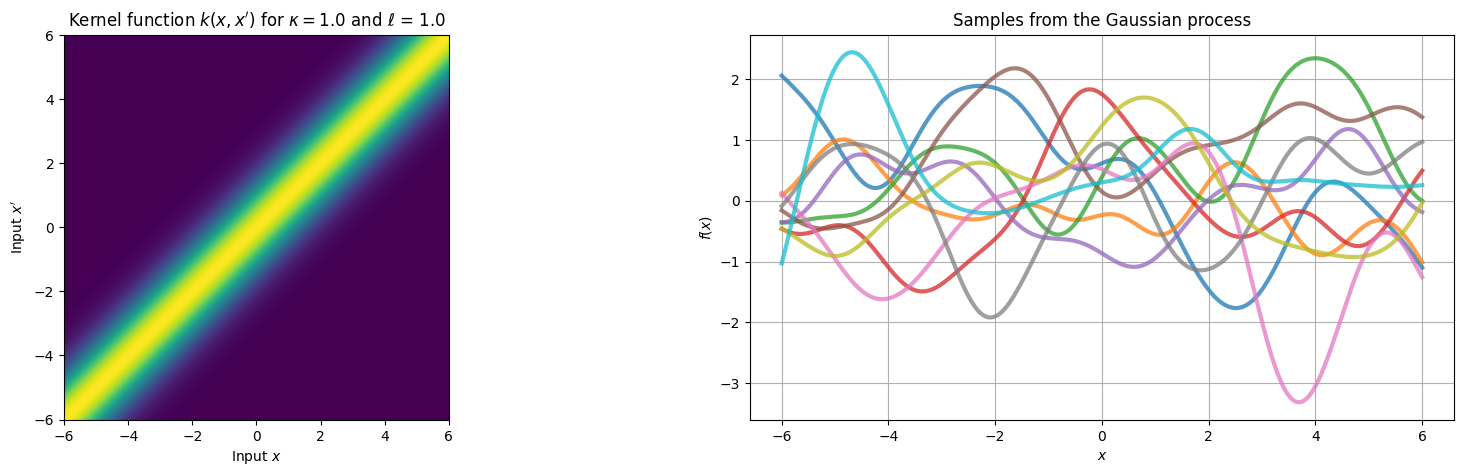

In [15]:
class StationaryIsotropicKernel(object):

    def __init__(self, kernel_fun, kappa=1., lengthscale=1.0):
        """
            the argument kernel_fun must be a function of three arguments kernel_fun(||tau||, kappa, lengthscale), e.g. 
            squared_exponential = lambda tau, kappa, lengthscale: kappa**2*np.exp(-0.5*tau**2/lengthscale**2)
        """
        self.kernel_fun = kernel_fun
        self.kappa = kappa
        self.lengthscale = lengthscale

    def contruct_kernel(self, X1, X2, kappa=None, lengthscale=None, jitter=1e-8):
        """ compute and returns the NxM kernel matrix between the two sets of input X1 (shape NxD) and X2 (MxD) using the stationary and isotropic covariance function specified by self.kernel_fun
    
        arguments:
            X1              -- NxD matrix
            X2              -- MxD matrix
            kappa           -- magnitude (positive scalar)
            lengthscale     -- characteristic lengthscale (positive scalar)
            jitter          -- non-negative scalar
        
        returns
            K               -- NxM matrix    
        """

        # extract dimensions 
        N, M = X1.shape[0], X2.shape[0]

        # prep hyperparameters
        kappa = self.kappa if kappa is None else kappa
        lengthscale = self.lengthscale if lengthscale is None else lengthscale

        ##############################################
        # Your solution goes here
        ##############################################
        
        # compute all the pairwise distances efficiently
        dists = np.sqrt(np.sum((np.expand_dims(X1, 1) - np.expand_dims(X2, 0))**2, axis=-1))
        
        # squared exponential covariance function
        K = self.kernel_fun(dists, kappa, lengthscale)
        
        # add jitter to diagonal for numerical stability
        if len(X1) == len(X2) and np.allclose(X1, X2):
            K = K + jitter*np.identity(len(X1))
        
        ##############################################
        # End of solution
        ##############################################
        
        assert K.shape == (N, M), f"The shape of K appears wrong. Expected shape ({N}, {M}), but the actual shape was {K.shape}. Please check your code. "
        return K

# create an Nx1 vector of equidistant points in [-6, 6]
N = 1000
X = np.linspace(-6, 6, N)[:, None]

# hyperparameters
kappa = 1.
scale = 1.

# number of samples to be plotted
num_samples = 10

# instantiate kernel object and construct kernel
kernel = StationaryIsotropicKernel(squared_exponential, kappa, scale)
K = kernel.contruct_kernel(X, X)

# plot
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

m = np.zeros(len(X))
im = ax[0].pcolormesh(X.flatten(), X.flatten(), K, shading='auto')
ax[0].set(xlabel='Input $x$', ylabel="Input $x'$", title=f"Kernel function $k(x, x')$ for $\kappa = {kappa:2.1f}$ and $\ell$ = {scale:2.1f}")
ax[0].grid(False)
ax[0].set_aspect('equal')
# add_colorbar(im, fig, ax[0])

f_samples = generate_samples(m, K, num_samples=num_samples, jitter=1e-8)
ax[1].plot(X, f_samples, alpha=0.75, linewidth=3);
ax[1].grid(True)
ax[1].set(xlabel='$x$', ylabel='$f(x)$', title='Samples from the Gaussian process');

In [16]:
def plot_with_uncertainty(ax, Xp, gp, color='r', color_samples='b', title="", num_samples=0):
    
    mu, Sigma = gp.predict_y(Xp)
    mean = mu.ravel()
    std = np.sqrt(np.diag(Sigma))

    # plot distribution
    ax.plot(Xp, mean, color=color, label='Mean')
    ax.plot(Xp, mean + 2*std, color=color, linestyle='--')
    ax.plot(Xp, mean - 2*std, color=color, linestyle='--')
    ax.fill_between(Xp.ravel(), mean - 2*std, mean + 2*std, color=color, alpha=0.25, label='95% interval')
    
    # generate samples
    if num_samples > 0:
        fs = gp.posterior_samples(Xstar, num_samples)
        ax.plot(Xp, fs[:,0], color=color_samples, alpha=.25, label="$f(x)$ samples")
        ax.plot(Xp, fs[:, 1:], color=color_samples, alpha=.25)
    
    ax.set_title(title)

In [22]:
# some data
Xtrain = np.array([[ 2.91169725], [ 0.52308353],
[-0.00549855], [ 1.49905518], [-2.98183831], [ 1.47742483], [ 0.8146361 ], [ 2.79468775], [ 2.41130079], [-1.28133202]])

ytrain = np.array([[ 3.05977784], [-0.61676851],
[-1.63553243], [-1.25508461], [ 3.29460984], [ 0.36725551], [-1.43577806], [ 2.63460322], [ 1.28582681], [-0.90506406]])

N = len(Xtrain)

# for predictions
Xstar = np.linspace(-3, 9, 100)[:, None]

# function for plotting
def plot_data(ax):
    ax.plot(Xtrain, ytrain, 'k.', markersize=12, label='Data')
    ax.grid(True)
    ax.set_xlabel('Input $x$')
    ax.set_ylabel('Response $y$')
    ax.legend()

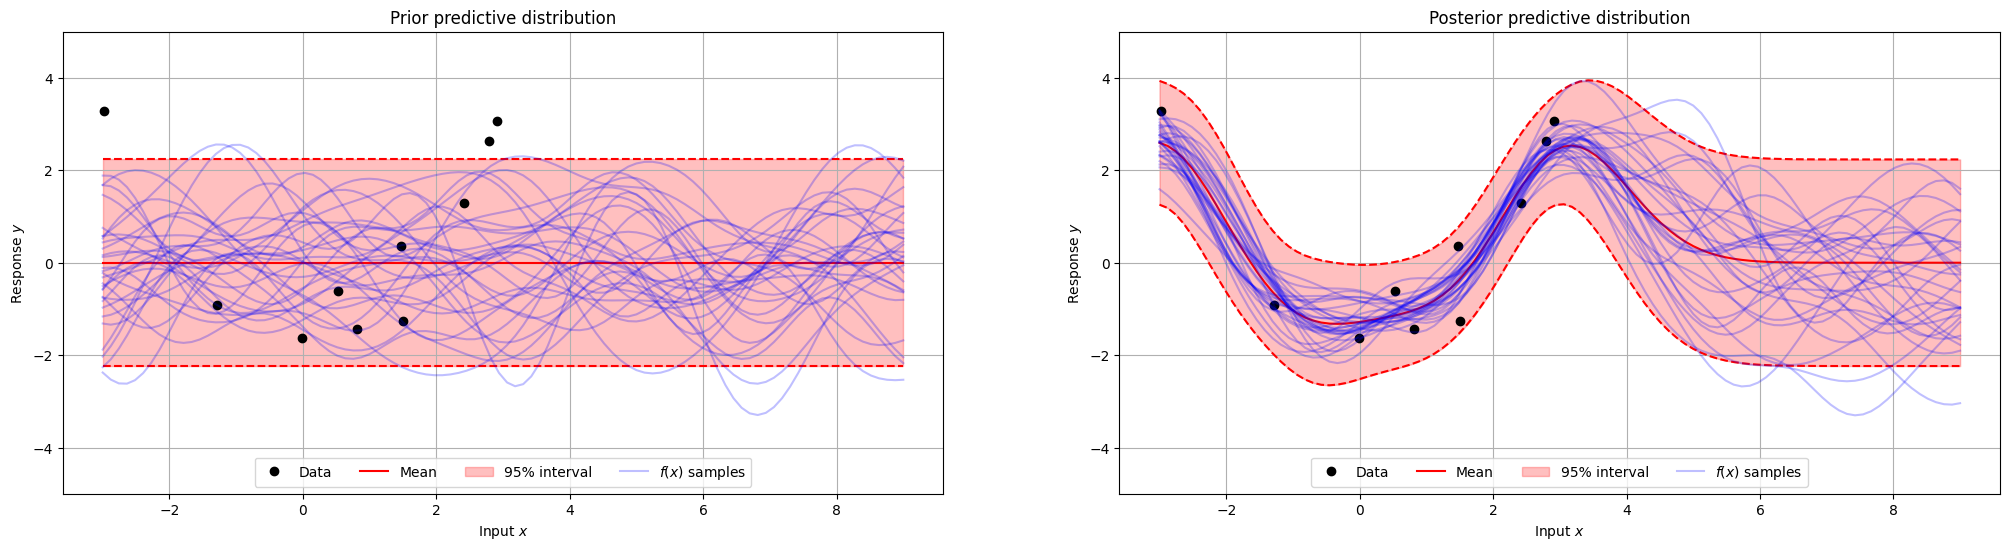

In [23]:
class GaussianProcessRegression(object):

    def __init__(self, X, y, kernel, scale=1., lengthscale=1., sigma=1/2, jitter=1e-8):
        """  
        Arguments:
            X                -- NxD input points
            y                -- Nx1 observed values 
            kernel           -- must be instance of the StationaryIsotropicKernel class
            jitter           -- non-negative scaler
            kappa            -- magnitude (positive scalar)
            lengthscale      -- characteristic lengthscale (positive scalar)
            sigma            -- noise std. dev. (positive scalar)
        """
        self.X = X
        self.y = y
        self.N = len(X)
        self.kernel = kernel
        self.jitter = jitter
        self.set_hyperparameters(kappa, lengthscale, sigma)

    def set_hyperparameters(self, kappa, lengthscale, sigma):
        self.kappa = kappa
        self.lengthscale = lengthscale
        self.sigma = sigma

    def posterior_samples(self, Xstar, num_samples):
        """
            generate samples from the posterior p(f^*|y, x^*) for each of the inputs in Xstar

            Arguments:
                Xstar            -- PxD prediction points
        
            returns:
                f_samples        -- numpy array of (P, num_samples) containing num_samples for each of the P inputs in Xstar
        """
        ##############################################
        # Your solution goes here
        ##############################################
        
        mu, Sigma = self.predict_f(Xstar)
        f_samples = generate_samples(mu.ravel(), Sigma, num_samples)
        
        ##############################################
        # End of solution
        ##############################################

        assert (f_samples.shape == (len(Xstar), num_samples)), f"The shape of the posterior mu seems wrong. Expected ({len(Xstar)}, {num_samples}), but actual shape was {f_samples.shape}. Please check implementation"
        return f_samples
        
    def predict_y(self, Xstar):
        """ returns the posterior distribution of y^* evaluated at each of the points in x^* conditioned on (X, y)
        
        Arguments:
        Xstar            -- PxD prediction points
        
        returns:
        mu               -- Px1 mean vector
        Sigma            -- PxP covariance matrix
        """

        ##############################################
        # Your solution goes here
        ##############################################
        
        # prepare relevant matrices
        mu, Sigma = self.predict_f(Xstar)
        Sigma = Sigma + self.sigma**2 * np.identity(len(mu))
        
        ##############################################
        # End of solution
        ##############################################

        return mu, Sigma

    def predict_f(self, Xstar):
        """ returns the posterior distribution of f^* evaluated at each of the points in x^* conditioned on (X, y)
        
        Arguments:
        Xstar            -- PxD prediction points
        
        returns:
        mu               -- Px1 mean vector
        Sigma            -- PxP covariance matrix
        """

        ##############################################
        # Your solution goes here
        ##############################################
        
        # prepare relevant matrices
        k = kernel.contruct_kernel(Xstar, self.X, self.kappa, self.lengthscale, jitter=self.jitter)
        K = kernel.contruct_kernel(self.X, self.X, self.kappa, self.lengthscale, jitter=self.jitter)
        Kstar = kernel.contruct_kernel(Xstar, Xstar, self.kappa, self.lengthscale, jitter=self.jitter)
        
        # Compute C matrix
        C = K + self.sigma**2*np.identity(len(self.X)) 

        # computer mean and Sigma
        mu = np.dot(k, np.linalg.solve(C, self.y))
        Sigma = Kstar - np.dot(k, np.linalg.solve(C, k.T))
        
        ##############################################
        # End of solution
        ##############################################

        # sanity check for dimensions
        assert (mu.shape == (len(Xstar), 1)), f"The shape of the posterior mu seems wrong. Expected ({len(Xstar)}, 1), but actual shape was {mu.shape}. Please check implementation"
        assert (Sigma.shape == (len(Xstar), len(Xstar))), f"The shape of the posterior Sigma seems wrong. Expected ({len(Xstar)}, {len(Xstar)}), but actual shape was {Sigma.shape}. Please check implementation"

        return mu, Sigma
    
    def log_marginal_likelihood(self, kappa, lengthscale, sigma):
        """ 
            evaluate the log marginal likelihood p(y) given the hyperparaemters 

            Arguments:
            kappa       -- positive scalar 
            lengthscale -- positive scalar
            sigma       -- positive scalar
            """

        ##############################################
        # Your solution goes here
        ##############################################
        
        # prepare kernels
        K = self.kernel.contruct_kernel(self.X, self.X, kappa, lengthscale)
        C = K + sigma**2*np.identity(self.N)

        # compute Cholesky decomposition
        L = np.linalg.cholesky(C)
        v = np.linalg.solve(L, self.y)

        # compute log marginal likelihood
        logdet_term = np.sum(np.log(np.diag(L)))
        quad_term =  0.5*np.sum(v**2)
        const_term = -0.5*N*np.log(2*np.pi)

        return const_term - logdet_term - quad_term
        
        ##############################################
        # End of solution
        ##############################################
        

# instantiate kernel
kernel = StationaryIsotropicKernel(kernel_fun=squared_exponential)

# instantiate GP without data (hence, posterior=prior) and with data
gp_prior = GaussianProcessRegression(np.zeros((0, 1)), np.zeros((0, 1)), kernel)
gp_post = GaussianProcessRegression(Xtrain, ytrain, kernel)

# plot
fig, ax = plt.subplots(1, 2, figsize=(25, 6))
plot_data(ax[0])
plot_with_uncertainty(ax[0], Xstar, gp_prior, title='Prior predictive distribution', num_samples=30)
ax[0].legend(loc='lower center', ncol=4)
ax[0].set_ylim((-5, 5))

plot_data(ax[1])
plot_with_uncertainty(ax[1], Xstar, gp_post, title='Posterior predictive distribution', num_samples=30)
ax[1].legend(loc='lower center', ncol=4)
ax[1].set_ylim((-5, 5));

### Gaussian Processes Classification

A gaussian process for binary classification follows the form:

$$
y_n \sim \text{Ber}(\sigma(f(x_n)))
$$

$$
f \sim \mathcal{GP}(0, k(x, x'))
$$

Where $\sigma$ is called the *inverse link function* and is usually either Sigmoid or CDF of the standard normal.

The joint distribution for latent function **f** and observations *y* is then:

$$
p(y, f) = p(y \mid f) p(f) = \prod_{n=1}^N \text{Ber}(y_n \mid \sigma(f_n)) \mathcal{N}(f \mid 0, K)
$$

Just like for the Bayesian logistic regression model, exact analytical Bayesian inference is intractable for this model, and therefore, we will resort to the Laplace approximation. Making predictions for a Gaussian process classification model using the Laplace approximation typically require threes steps:

- Step 1: Aproximating the posterior distribution $p(\mathbf{f}|\mathbf{y})$

- Step 2: Computing the posterior distribution of the latent function evaluated at a new point $\mathbf{x}^*$, i.e computing $p(f^*|\mathbf{y}, \mathbf{x}^*)$ where $f^* = f(\mathbf{x}^*)$.

- Step 3: Computing the posterior predictive distribution of the label $y^*$ for the input point $\mathbf{x}^*$, i.e. computing $p(y^*|\mathbf{y}, \mathbf{x}^*)$.

**Laplace Approximation for the Gaussian Process** is:

$$\begin{align*}
p(\mathbf{f}|\mathbf{y}) = \frac{p(\mathbf{y}|\mathbf{f})p(\mathbf{f})}{p(\mathbf{y})}\approx q(\mathbf{f}) = \mathcal{N}(\mathbf{f}|\mathbf{m}, \mathbf{S}),
\end{align*}$$

With $m = f_{MAP}$ and $\mathbf{S}$ is the inverse Hessian.

For laplace **approximation** we:

1) Write the joint distribution: $\log p(\mathbf{y}, \mathbf{f}) = \log p(\mathbf{y}|\mathbf{f}) + \log p(\mathbf{f})$
2) The gradient and Hessian is then calculated: $\text{Grad:} \quad \nabla_{\mathbf{f}} \log p(\mathbf{y}, \mathbf{f}) \qquad \text{Hessian:} \quad  \nabla_{\mathbf{f}}^2 \log p(\mathbf{y}, \mathbf{f})$
3) Calculate:

$$\begin{align*}
\mathbf{m} &= \hat{\mathbf{f}}_{\text{MAP}}\\
\mathbf{S} &= \left(\mathbf{K}^{-1} + \Lambda\right)^{-1}
\end{align*}$$

Where $\Lambda \in \mathbb{R}^{N \times N}$ is a diagonal matrix with elements $\Lambda_{nn} = -\nabla_{\mathbf{f}}^2 \log  p(y_n|f_n)$

The **posterior distribution** of the latent f is then:

$$\begin{align*}
p(f^*|\mathbf{y}, \mathbf{x}^*) \approx  \mathcal{N}(f^*|\mu_{f^*|\mathbf{y}}, \sigma^2_{f^*|\mathbf{y}}),
\end{align*}$$

where 

$$\begin{align*}
\mu_{f^*|\mathbf{y}} &=  \mathbf{k}^T \mathbf{K}^{-1} \mathbf{m},\\
\sigma^2_{f^*|\mathbf{y}} &= c - \mathbf{k}^T \mathbf{K}^{-1} (\mathbf{K} - \mathbf{S}) \mathbf{K}^{-1} \mathbf{k}
\end{align*}$$

where $c = k(\mathbf{x}_*, \mathbf{x}_*)$ is the prior variance of $f^*$, $\mathbf{k} \in \mathbb{R}^N$ is a vector with entries given by $\mathbf{k}_n = k(\mathbf{x}_*, \mathbf{x}_n)$, and $\mathbf{K} \in \mathbb{R}^{N \times N}$ is prior covariance of $\mathbf{f}$. If you want to compute the joint distribution the predictions for $P$ input points $\mathbf{x}^*$ at once, then $\mathbf{k}$ becomes a $P \times N$-matrix and $c$ becomes a $P \times P$-matrix.

We can then write up the distribution of the functions that can generate our new data:
$$\begin{align*}
p(f^*|\mathbf{f}, \mathbf{x}^*) &= \mathcal{N}(f^*|\mu_{f^*|\mathbf{f}}, \sigma^2_{f^*|\mathbf{f}}),\\
\mu_{f^*|\mathbf{f}} &= \mathbf{k}^T \mathbf{K}^{-1}\mathbf{f} \\
 \sigma^2_{f^*|\mathbf{f}} &= k(\mathbf{x}^*, \mathbf{x}^*) - \mathbf{k}^T \mathbf{K}^{-1} \mathbf{k}
\end{align*}$$

or equivalently

$$\begin{align*}
p(f^*|\mathbf{f}, \mathbf{x}^*) &= \mathcal{N}(f^*|\, \mathbf{k}^T \mathbf{K}^{-1}\mathbf{f} \, , \, k(\mathbf{x}^*, \mathbf{x}^*) - \mathbf{k}^T \mathbf{K}^{-1} \mathbf{k})
\end{align*}
$$

And finally, the **posterior predictive distribution**:

$$
\begin{align*}
p(y^* = 1|\mathbf{y}, \mathbf{x}^*) \approx \int \sigma(f^*) p(f^*|\mathbf{y}) \text{d} f^*.
\end{align*}
$$

We use the **probit approximation**, which approximates the sigmoid as follows: $\sigma(f^*) \approx \Phi(f^* \sqrt{\frac{\pi}{8}})$, where $\Phi$ is the cumulative distribution function of the standard normal distribution. The benefit is that the expectation value of the approximation can be computed analytically as follows:
$$
\begin{align*}
p(y^* = 1|\mathbf{y}, \mathbf{x}^*) \approx \int \sigma(f^*) p(f^*|\mathbf{y}, \mathbf{x}^*) \text{d} f^* \approx \int \phi\left(f^* \sqrt{\frac{\pi}{8}}\right) p(f^*|\mathbf{y}, \mathbf{x}^*) \text{d} f^* = \Phi\left(\frac{\mu_{f^*}}{\sqrt{\frac{8}{\pi} + \sigma^2_{f^*}}}\right) \tag{3}
\end{align*}
$$

**We still recall that this is in the binary case**

# Multiclass Classification
**Week 7**

In [ ]:
# ---- Toy dataset ----
np.random.seed(0)
# number of data points per class
M = 50
# generate simple synthetic toy dataset
xi = [np.random.normal(-3, 1, size=(M, 1)), np.random.normal(-1, 1, size=(M, 1)), np.random.normal(1, 1, size=(M, 1)), np.random.normal(3, 1, size=(M, 1))]

x = np.row_stack((xi))
y = np.hstack((np.zeros(M), np.ones(M), 2*np.ones(M), 3*np.ones(M))) 
num_classes = 4

# specify input points for predictions
xstar = np.linspace(-6, 6, 300) # 300 xstar points to make predictions fo
# ---- BayesianLinearSoftmax class  ----
from week7 import BayesianLinearSoftmax 
# First, make the design matrix
design_matrix = lambda x: np.column_stack((np.ones(len(x)), x))
# fit model and compute predictions
model = BayesianLinearSoftmax(design_matrix(x), y)
# posterior distribution of f^*, i.e. p(f^* | x^*, y)
mu_f, var_f = model.predict_f(design_matrix(xstar))
# p(y^*=k|y, x^*) using Monte Carlo sampling
phat = model.predict_y(design_matrix(xstar)) # This will give a num_xstar class

In [ ]:
# Entropy and confidence
from week7 import entropy, confidence
confidence(phat)
entropy(phat)

# Calibration
**Week 7**
BUT THERE ARE NO EXERCISES.

We use Expected Calibration Error **(ECE)**-metric and **reliability plots**.

For a test set $\{\mathbf{x}_m^*, y^*_m\}^M_{m=1}$ and our predictions from the maximum of the posterior predictive: $\hat{y}^*_m=\argmax_k p(y^*_m=k|\mathbf{y,x}^*m$.
We can calculate the ECE:

- Compute predictions for validation set $D_{\text{val}} = \{x_m^*, y_m^*\}^M_{m=1}$

- Divide unit interval in $B$ bins such that $I_b = \left(\frac{b-1}{B}, \frac{b}{B}\right)$

- Let $B_b$ be the set of indices of samples whose prediction confidence falls into interval $I_b$ and define:
  - $y_m^* = \arg\max_c p(y_m^* = c \mid x_m^*)$
  - $p_m^* = \max_c p(y_m^* = c \mid x_m^*)$

- Then **average accuracy** for bin $b$ is defined as:
  - $\text{acc}(B_b) = \frac{1}{|B_b|} \sum_{n \in B_b} \mathbf{1}[y_m^* = y_m^*]$

- and the **average confidence** for bin $b$ is:
  - $\text{conf}(B_b) = \frac{1}{|B_b|} \sum_{n \in B_b} p_m^*$

- The **expected calibration error (ECE)** is then given by:
  - $ECE = \sum_{b=1}^B \frac{|B_b|}{M} |\text{acc}(B_b) - \text{conf}(B_b)|$
